<center>

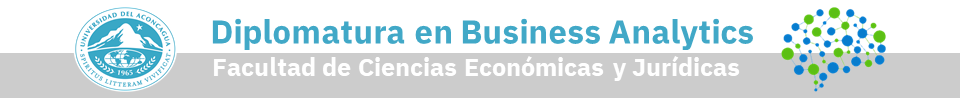

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 9

</font>
</center>

~~~
Pablo Ariel Genero
~~~

**Instrucciones del Trabajo Final**

- Desarrollar los puntos necesarios para generar los modelos de clasificación.
- Puede usar PyCaret, Scikit-learn o ambos
- Puede generar graficos en cualquier instancia del desarrollo
- Al final del colab, generar una breve conclusión
- Al finalizar, generar PDF del Google Colab para subir en plataforma

En virtud del DataFrame propuesto, generar modelos de clasificación para predecir la contratación de depositos a plazo:

- **age:** edad del cliente, valor numérico entero mayor a 18.
- **job:** trabajo del cliente.
- **marital:** estado civil del cliente.
- **education:** educación alcanzada por el cliente.
- **default:** si el cliente posee deudas.
- **balance:** depósito del cliente en euros.
- **housing:** propietario de inmueble o alquila.
- **loan:** si el cliente tiene un préstamo.
- **contact:** último contacto del cliente.
- **day:** día del último contacto del cliente.
- **month:** mes del último contacto el cliente.
- **duration:** duración del último contacto del cliente.
- **campaign:** identificación de la campaña.
- **pdays:** dias posteriores a la campaña.
- **previous:** números de contactos previos a la campaña.
- **poutcome:** resultados de la campaña anterior.
- **y:** si suscribe un depósito a plazo posterior a campaña.

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np

# **Creación del DataFrame**

In [2]:
url="https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/"
archivo="bank-full.csv"
clasificacion = pd.read_csv(url+archivo)
clasificacion.replace({"unknown": None}, inplace=True)

In [3]:
clasificacion.head()

age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0     None  no
1   44    technician   single  secondary  ...    -1         0     None  no
2   33  entrepreneur  married  secondary  ...    -1         0     None  no
3   47   blue-collar  married       None  ...    -1         0     None  no
4   33          None   single       None  ...    -1         0     None  no

[5 rows x 17 columns]

## Esquema de trabajo

• El primer modelo de clasificación lo voy a desarrollar con PyCaret, y luego para el segundo Scikit-learn para tratar de mejorarlo.

• El modelo a usar es el **árbol de desición**.

# **Generación del primer modelo de clasificación**

Se comienza realizando la división del conjunto de datos en entrenamiento y prueba. El DF original se duplica, para no alterarlo ante cualquier modificación.

In [4]:
datos = clasificacion.copy(deep=False)

In [5]:
datos_train = clasificacion.sample(frac=0.75, random_state=0)
datos_test = clasificacion.drop(datos_train.index)
datos_train.reset_index(inplace=True, drop=True)
datos_test.reset_index(inplace=True, drop=True)

In [6]:
print("==================================")
print("  Entrenmiento ---→", datos_train.shape)
print("  Prueba ---------→", datos_test.shape)
print("  DF original ----→", clasificacion.shape)
print("==================================")

  Entrenmiento ---→ (33908, 17)
  Prueba ---------→ (11303, 17)
  DF original ----→ (45211, 17)


## Instalación de PyCaret

Se realiza la instalación de PyCaret, se habilita en entorno en Colab y luego se importan todas las funciones para los algoritmos de clasificación. 

In [7]:
!pip install pycaret[full]

In [8]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [9]:
from pycaret.classification import *
#Importo TODO lo relacionado a clasificación en PyCaret

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Creando el modelo

Se crea el modelo mediante la ejecución de **setup()**. Se dejan los parámetros por defecto definidos por PyCaret, y luego se interpreta lo realizado:

In [10]:
clasificacion_m1 = setup(data = datos_train, target = "y", session_id=0)

Description             Value
0                               session_id                 0
1                                   Target                 y
2                              Target Type            Binary
3                            Label Encoded     no: 0, yes: 1
4                            Original Data       (33908, 17)
5                           Missing Values              True
6                         Numeric Features                 7
7                     Categorical Features                 9
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (23735, 48)
12                    Transformed Test Set       (10173, 48)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              704c
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

El **setup** realiza un preprocesamiento de los datos. La variable objetivo ***$ y $*** se interpreta como binaria, donde el valor *No / Si* fueron codificados con 0 y 1 respectivamente.

Se puede ver que ha detectado la presencia de valores nulos (**Missing values=True**), los cuales por defecto rellena con la media para las variables numéricas y con el más frecuente para las no numéricas.

En cuanto a las variables categóricas, por defecto se codifican con el método One Hot Encoding, y eso se puede corroborar en los procesos 8/9/10, donde se ve que no se realizó acción por alta cardinalidad de varibales, ni se hizo una codificación ordinaria.

También se puede ver entre 29-32 que no se realizó ninguna transformación y normalización del conjunto de datos. En el paso 44 se indica que se ha removido la colinearidad entre variables del set de datos, por lo que alguna/s de las variables debe haber sido quitada durante el entrenamiento.

El modelo de clasificación a desarrollar es **Arbol de desición**:

In [13]:
ad_1 = create_model('dt')
print(ad_1)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8715  0.7082  0.4946  0.4570  0.4750  0.4020  0.4024
1       0.8703  0.6779  0.4265  0.4457  0.4359  0.3626  0.3628
2       0.8669  0.6962  0.4731  0.4385  0.4552  0.3795  0.3798
3       0.8846  0.7094  0.4803  0.5095  0.4945  0.4294  0.4296
4       0.8703  0.6966  0.4695  0.4502  0.4596  0.3860  0.3861
5       0.8753  0.6963  0.4624  0.4691  0.4657  0.3951  0.3951
6       0.8774  0.7146  0.5018  0.4795  0.4904  0.4207  0.4208
7       0.8626  0.6705  0.4194  0.4164  0.4179  0.3400  0.3400
8       0.8614  0.7024  0.4946  0.4233  0.4562  0.3773  0.3788
9       0.8639  0.7039  0.4946  0.4312  0.4608  0.3833  0.3845
Mean    0.8704  0.6976  0.4717  0.4520  0.4611  0.3876  0.3880
SD      0.0069  0.0131  0.0273  0.0267  0.0218  0.0249  0.0249

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


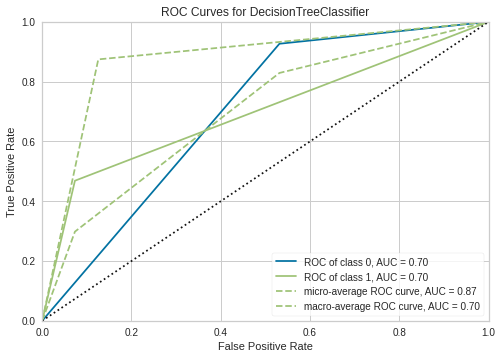

In [14]:
plot_model(ad_1, plot = 'auc')

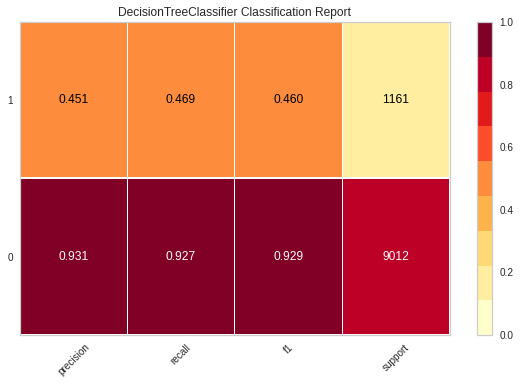

In [15]:
plot_model(ad_1, plot = 'class_report')

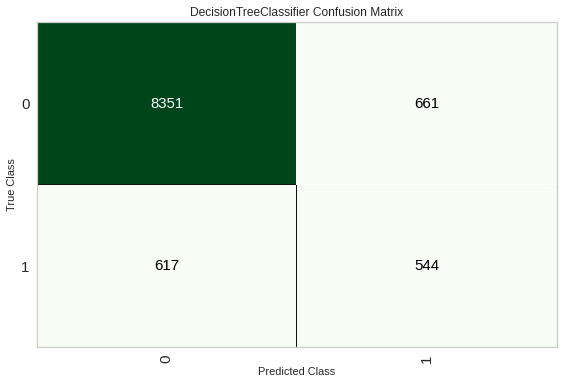

In [16]:
plot_model(ad_1, plot = 'confusion_matrix')

In [17]:
evaluate_model(ad_1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(ad_1);

Model  Accuracy     AUC  ...      F1   Kappa     MCC
0  Decision Tree Classifier    0.8744  0.6976  ...  0.4598  0.3888  0.3889

[1 rows x 8 columns]

Cuando se ejecuta el **setup** PyCaret separa de forma automática los datos (por defecto en 70/30) para entrenar con una parte, y la porción restante la usa para predecir según lo entrenado(predict_model). Lo que se puede ver aquí es que las métricas de la predicción son muy similares a las que se obtuvieron luego del entrenamiento, con lo cual se puede avanzar hacia la finalización del modelo. Si en este punto hubiera diferencias significativas, debería revisar en donde pueden originarse y podría alertar sobre algún problema en el entrenamiento del modelo.

## Finalizando el modelo

In [19]:
final_ad = finalize_model(ad_1)
print(final_ad)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [20]:
datos_test_prediccion = predict_model(final_ad, data=datos_test)
datos_test_prediccion.head()

age         job   marital  education  ... poutcome   y Label Score
0   35  management   married   tertiary  ...     None  no    no   1.0
1   41      admin.  divorced  secondary  ...     None  no    no   1.0
2   29      admin.    single  secondary  ...     None  no    no   1.0
3   58  technician   married       None  ...     None  no    no   1.0
4   33    services   married  secondary  ...     None  no    no   1.0

[5 rows x 19 columns]

In [21]:
from pycaret.utils import check_metric
print("Accuracy", check_metric(datos_test_prediccion['y'], datos_test_prediccion['Label'], metric = "Accuracy"))
print("Recall", check_metric(datos_test_prediccion['y'], datos_test_prediccion['Label'], metric = "Recall"))
print("Prescision", check_metric(datos_test_prediccion['y'], datos_test_prediccion['Label'], metric = "Precision"))
print("F1-Score", check_metric(datos_test_prediccion['y'], datos_test_prediccion['Label'], metric = "F1"))

Accuracy 0.8773
Recall 0.4963
Prescision 0.4822
F1-Score 0.4891


# **Generación del segundo modelo de clasificación**

Se importan los módulos para la confección del segundo modelo, y se duplica el Df para no alterarlo por cualquier modificación.

In [22]:
from sklearn.tree import DecisionTreeClassifier #Arbol de desición
import sklearn.metrics as metrics #Para la medición de los algoritmos
from sklearn.preprocessing import LabelEncoder #Para codificar

In [23]:
clasificacion_m2 = clasificacion.copy(deep=False)

## Codificación de variables categóricas

In [24]:
codificar = LabelEncoder()

En primer lugar se codifican los meses siguiendo el orden del calendario:

In [25]:
def mes(month):
  if month == "jan":
    return int("1")
  elif month == "feb":
    return int("2")
  elif month == "mar":
    return int("3")
  elif month == "apr":
    return int("4")
  elif month == "may":
    return int("5")
  elif month == "jun":
    return int("6")
  elif month == "jul":
    return int("7")
  elif month == "aug":
    return int("8")
  elif month == "sep":
    return int("9")
  elif month == "oct":
    return int("10")
  elif month == "nov":
    return int("11")
  else: 
    return int("12")

In [26]:
clasificacion_m2.month = clasificacion.month.apply(mes)

Las restantes variables categóricas se codifican con LabelEncoder, excepto ***poutcome*** que está muy desbalanceada y será eliminada, y ***default*** que sólo toma 2 valores y se encuentra muy desbalanceada (por lo que también se va a eliminar).
En el primer modelo que se contruyó en base a PyCaret, las variables categóricas se codificaron por el método one-hot-encoding. Investigando sobre este tema, pude leer en un artículo la referencia a un estudio en donde se concluye que para los algorítmos basados en árboles de desición no hay una diferencia clara en términos de capacidad predictiva al usar one-hot respecto a otro método. Lo que suscede al usar one-hot es que aumenta la dimensionalidad del modelo y el entrenamiento consume más tiempo.

In [27]:
clasificacion_m2.job = codificar.fit_transform(clasificacion.job.apply(str))
clasificacion_m2.marital = codificar.fit_transform(clasificacion.marital.apply(str))
clasificacion_m2.education = codificar.fit_transform(clasificacion.education.apply(str))
clasificacion_m2.housing = codificar.fit_transform(clasificacion.housing.apply(str))
clasificacion_m2.loan = codificar.fit_transform(clasificacion.loan.apply(str))
clasificacion_m2.contact = codificar.fit_transform(clasificacion.contact.apply(str))
clasificacion_m2.default = codificar.fit_transform(clasificacion.default.apply(str))

## Imputación de valores faltantes

In [28]:
from sklearn.impute import SimpleImputer

La codificación con LabelEncoder hace que los valores **None** se codifiquen con 0. En base a esto, consulto las variables que tenian valores nulos para realizar una imputación:

In [29]:
clasificacion.isnull().sum().sort_values(ascending=False)

poutcome     36959
contact      13020
education     1857
job            288
loan             0
marital          0
default          0
balance          0
housing          0
y                0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
age              0
dtype: int64

• La variable **poutcome** no se considera, ya que la idea es eliminarla por la gran cantidad de faltantes.

• Las variables a considerar son **job**, **education** y **contact**, y el método es el valor más frecuente (tal cual lo hizo PyCaret). El motivo está en la simplicidad y en el hecho de que las variables no se encuentran entre las más importantes según Feature Importance de PyCaret (considerar que PyCaret codifica con one-hot y crea más variables).

• El valor de missing_values es *0*, ya que así quedarón codificados los valores None por el método LabelEncoder.

In [30]:
imput_job = SimpleImputer(missing_values=0, strategy="most_frequent")
imput_education = SimpleImputer(missing_values=0, strategy="most_frequent")
imput_contact = SimpleImputer(missing_values=0, strategy="most_frequent")

In [31]:
clasificacion_m2.job = imput_job.fit_transform(clasificacion_m2[["job"]])
clasificacion_m2.education = imput_education.fit_transform(clasificacion_m2[["education"]])
clasificacion_m2.contact = imput_contact.fit_transform(clasificacion_m2[["contact"]])

A continuación verifico como se han impactado los cambios:

In [32]:
clasificacion.head()

age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0     None  no
1   44    technician   single  secondary  ...    -1         0     None  no
2   33  entrepreneur  married  secondary  ...    -1         0     None  no
3   47   blue-collar  married       None  ...    -1         0     None  no
4   33          None   single       None  ...    -1         0     None  no

[5 rows x 17 columns]

In [33]:
clasificacion_m2.head()

age  job  marital  education  ...  pdays  previous  poutcome   y
0   58    5        1          3  ...     -1         0      None  no
1   44   10        2          2  ...     -1         0      None  no
2   33    3        1          2  ...     -1         0      None  no
3   47    2        1          2  ...     -1         0      None  no
4   33    2        2          2  ...     -1         0      None  no

[5 rows x 17 columns]

Por último se codifica la variable objetivo **$y$** para que el valor No / Yes queden representados por 0 / 1:

In [34]:
clasificacion_m2.y.replace({"no": 0, "yes": 1}, inplace=True)

## Eliminando variables

Se eliminan las variables que no se van a usar en el entrenamiento, buscando que con esto mejore el modelo:

• poutcome por tener muchos valores nulos;

• previous por estar relacionada a pdays y no aportar demasiada información;

• default por tener sólo 2 valores, uno de los cuales (saldo negativo) está escasamente representado.

En este punto es muy interesante valerse de la evaluación del modelo que hace PyCaret, especialmente de la pestaña de Features Importance.

In [35]:
clasificacion_m2.drop(columns=(["poutcome","previous","default"]), 
               axis=1, inplace=True)

## Dividiendo el conjunto de datos

In [37]:
y = clasificacion_m2["y"]
X = clasificacion_m2.drop(columns=["y"])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Escala vector de entrada

Se normaliza también el vector de entrada para tratar de mejorar el modelo:

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
normalizar = StandardScaler()

In [42]:
X_train = normalizar.fit_transform(X_train)
X_test = normalizar.transform(X_test)

## Creando el modelo

In [43]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics #para la medición de los algoritmos

Otra estrategia para mejorar el modelo es cambiar algunos de los hiperparámetros respecto a lo que arrojó PyCaret. Entre ellos se modifican **min_sample_splits** y **min_samples_leaf**. 

También se trabja con **calss_weight**, debido a que la variable objetivo se encuentra desbalanceada, habiendo un 11.6% de valores *Si* y un 88.3% de valores *No*. Este hiperparámetro permite reconocer un desbalanceo en alguna de las clases, para lo cual (según lo que investigué) hay que indicar el valor de la clase y el valor del desbalanceo mediante una notación de diccionario {1:7.54} donde 1 equivale a *Si* y 7.54 es el valor de la proporción del desbalanceo (que se obtiene dividiendo la categoría *No* sobre *Si*).

In [44]:
clasificacion.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [45]:
print("Desbalanceo proporción:", round(39922/5289,4))

Desbalanceo proporción: 7.5481


In [46]:
ad = DecisionTreeClassifier(ccp_alpha=0.0, class_weight={1:7.54}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [47]:
ad.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={1: 7.54}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicción y métricas

In [48]:
y_pred_ad = ad.predict(X_test)

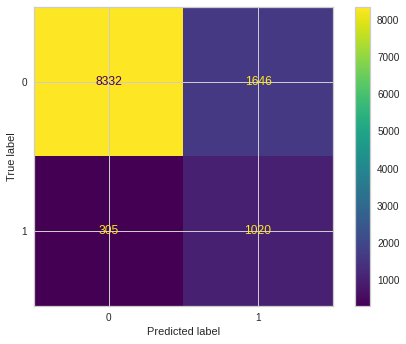

In [49]:
metrics.plot_confusion_matrix(ad, X_test, y_test);

In [50]:
mc = metrics.confusion_matrix(y_test, y_pred_ad)
print(mc)

[[8332 1646]
 [ 305 1020]]


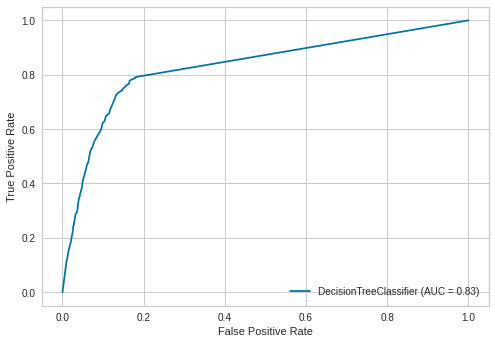

In [ ]:
metrics.plot_roc_curve(ad,X_test,y_test)

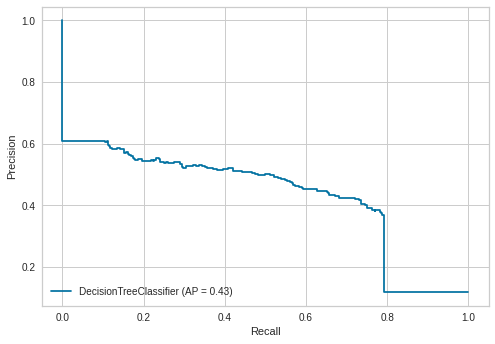

In [51]:
metrics.plot_precision_recall_curve(ad,X_test,y_test)

In [52]:
reporte = metrics.classification_report(y_test, y_pred_ad)
print(reporte)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      9978
           1       0.38      0.77      0.51      1325

    accuracy                           0.83     11303
   macro avg       0.67      0.80      0.70     11303
weighted avg       0.90      0.83      0.85     11303



# **Conclusiones**

Despues de haber desarrollado ambos modelos, se consigue un mayor valor en el *Recall* pasando de 0.49 en el primer modelo a 0.77 en el segundo. El valor del Accuracy cae de 0.87 a 0.83, Precision lo hace de 0.48 a 0.38, mientras que F1-Score aumente de 0.48 a 0.51.

Desde mi punto de vista el resultado es bueno teniendo en cuenta el problema de negocio, que intenta clasificar a los clientes entre quienes constituyen o no un depósito a plazo. De esta forma, viendo la matriz de confusión del segundo modelo, para la clase 1 (*Si*) el modelo acierta en 1020 de las muestras y no lo hace en 305, con lo que mejoró en la posibilidad de reconocer a los clientes que constituyen un depósito, que es lo que se está tratando de resolver según el planteo de la entidad. Se observa que ha aumentado el número de los falsos positivos, pero no debería ser tan grave dentro del problema de negocio planteado. 

Si me pongo en el lugar de la entidad, el modelo puede detectar a más del 75% de los clientes que contituyen un depósito, teniendo en cuenta que es un porcentaje bajo el total de clientes que lo hacen (11.6% del total en base al set de datos usado). Si el banco quisiera desarrollar alguna campaña o implementar una acción que impacte directamente sobre esos clientes, el modelo ayudaría a detectarlos para evitar tener que trabajar sobre todo el universo de clientes. Los falsos positivos son un error en el etiquetado por parte del modelo, pero aún así serían un "costo acpetable" dentro de esa logica.

En cuanto a la parte operativa, PyCaret procesa de forma rápida el conjunto de datos y devuelve información muy útil a la hora de intentar mejorar el algoritmo. De esta forma, para el segundo modelo mi estrategia fue construirlo a partir de esa base y una vez que obtuve el esquema general, lo fui ajustando para lograr una mejoría, probando distintos cambios en hiperparámetros, variables, codificación, etc. 

